In [1]:
import pandas as pd
import sklearn
import numpy as np
import scipy as sp
import operator
import csv
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import CountVectorizer
import operator

matplotlib.style.use('ggplot')
%matplotlib notebook 

/Users/amy/anaconda/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [36]:
df = pd.read_json('./data/cream_sephora.json')

In [37]:
for i in df.columns: 
    print i

brand
category
five_star_reviews
four_star_reviews
ingredient
lastpage
name
number_loves
number_reviews
one_star_reviews
price
review_rating
reviews
size
sku
three_star_reviews
two_star_reviews


In [38]:
df.head()

,brand,category,five_star_reviews,four_star_reviews,ingredient,lastpage,name,number_loves,number_reviews,one_star_reviews,price,review_rating,reviews,size,sku,three_star_reviews,two_star_reviews
0,[Embryolisse],[Mists &amp; Essences],"[7, 7]","[1, 1]","[Water, Glycerin, Prunus Armeniaca Kernel Oil,...",[4],"[, Hydra-Mat Emulsion]",[2625],[18 reviews],"[4, 4]",[$40.00],[3.2222],"[{'title': u'Not Mat', 'text': [u'I was hoping...",NaN,[P393524],"[3, 3]","[3, 3]"
1,[Kate Somerville],[Face Oils],"[67, 67]","[20, 20]","[Ethyl Macadamiate, Coconut Oil , Moringa Olei...",[21],"[, Dilo Oil Restorative Treatment]",[3133],[102 reviews],"[2, 2]",[$65.00],[4.4118],"[{'title': u'Just Okay', 'text': [u'I am a str...",NaN,[P382353],"[7, 7]","[6, 6]"
2,[Eve Lom],[Moisturizers],NaN,NaN,"[Water, Butyrospermum Parkii (Shea) Oil, Isono...",NaN,"[, TIME RETREAT Face Treatment]",[79],[not rated],NaN,[$110.00],[0.0],NaN,NaN,[P414079],NaN,NaN
3,[Dr. Jart+],[Mists &amp; Essences],"[24, 24]","[4, 4]","[Water, Dipropylene Glycol, Butylene Glycol, P...",[8],"[, PORE MEDIC Pore Minish Mist]",[4531],[40 reviews],"[5, 5]",[$30.00],[3.95],"[{'title': u'misty fresh!', 'text': [u'I love ...",NaN,[P385321],"[3, 3]","[4, 4]"
4,[REN],[Moisturizers],"[66, 66]","[19, 19]","[Rosa Damascena Flower Water, Caprylic/Capric ...",[20],"[, Ultra Moisture Day Cream]",[1855],[99 reviews],"[4, 4]",[$55.00],[4.3939],"[{'title': None, 'text': [u'This product is no...",NaN,[P214000],"[5, 5]","[5, 5]"


In [ ]:
#Put price into the prediction

In [41]:
for index, row in df.iterrows(): 
    try: 
        df.loc[index, 'brand'] = row['brand'][0]
    except: 
        df.loc[index, 'brand'] = ''
        pass
    
    try:
        df.loc[index, 'number_reviews'] = int(row['number_reviews'][0].split()[0])
    except:
        df.loc[index, 'number_reviews'] = 0
        pass
    
    try: 
        df.loc[index, 'one_star_reviews'] = int(row['one_star_reviews'][0])
    except: 
        df.loc[index, 'one_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'two_star_reviews'] = int(row['two_star_reviews'][0])
    except: 
        df.loc[index, 'two_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'three_star_reviews']  = int(row['three_star_reviews'][0])
    except: 
        df.loc[index, 'three_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'four_star_reviews'] = int(row['four_star_reviews'][0])
    except: 
        df.loc[index, 'four_star_reviews'] = 0 
        pass
    try: 
        df.loc[index, 'five_star_reviews'] = int(row['five_star_reviews'][0])
    except: 
        df.loc[index, 'five_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'price'] = float(row['price'][0].replace('$', ''))
    except: 
        df.loc[index, 'price'] = .0
        pass
    
    try: 
        df.loc[index, 'review_rating'] = float(row['review_rating'][0])
    except:
        df.loc[index, 'review_rating'] = .0
        pass
    
    try: 
        df.loc[index, 'name'] = row['name'][-1]
    except:
        df.loc[index, 'name'] = ''
        pass

    try: 
        df.loc[index, 'number_loves'].apply()
        df.loc[index, 'number_loves'] = int(row['number_loves'][-1])
    except:
        df.loc[index, 'number_loves'] = .0
        pass

    try: 
        df.loc[index, 'category'] = row['category'][-1]
    except: 
        df.loc[index, 'category'] = ''
        pass 

In [42]:
print df['number_reviews'].sum()
print df['one_star_reviews'].sum()
print df['two_star_reviews'].sum()
print df['three_star_reviews'].sum()
print df['four_star_reviews'].sum()
print df['five_star_reviews'].sum()

122495
7762
7593
9127
20917
55170


In [43]:
df[(df['name'] == 'Moisture Surge Extended Thirst Relief')]

,brand,category,five_star_reviews,four_star_reviews,ingredient,lastpage,name,number_loves,number_reviews,one_star_reviews,price,review_rating,reviews,size,sku,three_star_reviews,two_star_reviews
466,CLINIQUE,Moisturizers,0,326,NaN,[455],Moisture Surge Extended Thirst Relief,[40K],2273,79,39,4.502,"[{'title': None, 'text': [u'I have combination...","[0.5 oz/ 15 mL, 1.7 oz/ 50 mL, 2.5 oz/ 73 mL]",[P209117],98,98


<IPython.core.display.Javascript object>


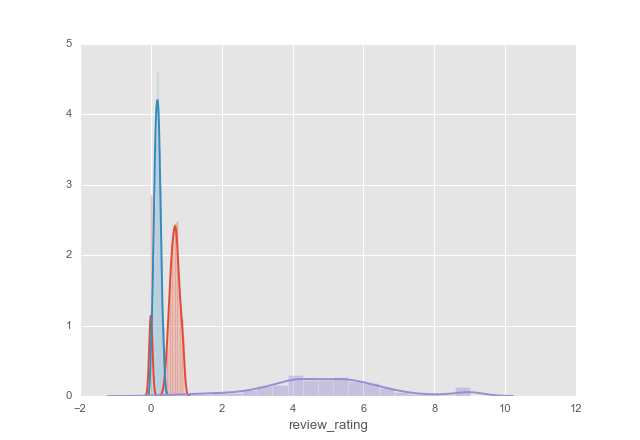

In [20]:
#sns.distplot(df['number_loves'])
#sns.distplot(df['number_loves'].apply(lambda x: np.sqrt(np.power(x, 1./5))))
#sns.distplot(df['number_reviews'].apply(lambda x: np.sqrt(np.log(x + 1))))
#sns.distplot(df['review_rating'].apply(lambda x: (x - 2.)**2))

sns.distplot(df['number_loves'].apply(lambda x: 0.15*np.power(x, 1./5)))
sns.distplot(df['number_reviews'].apply(lambda x: 0.05*np.log(x + 1)))
sns.distplot(df['review_rating'].apply(lambda x: (x - 2.)**2))

In [21]:
df.loc[:, 'n_loves_transform'] = df['number_loves'].apply(lambda x: .15*np.power(x, 1./5))

In [22]:
df.loc[:, 'n_reviews_transform'] = df['number_reviews'].apply(lambda x: .05*np.log(x + 1))

In [23]:
df.loc[:, 'review_rating_transform'] = df['review_rating'].apply(lambda x: (x - 2.)**2)

In [24]:
def cal_score(row): 
    if row['n_loves_transform'] < 0.0001 and row['n_reviews_transform'] < 0.0001: 
        return .0
    if row['n_loves_transform'] < 0.0001: 
        return np.sqrt(row['n_reviews_transform'])*row['review_rating_transform']
    elif row['n_reviews_transform'] < 0.0001: 
        return np.sqrt(row['n_loves_transform'])*row['review_rating_transform']
    else: 
        return np.sqrt((row['n_loves_transform']*row['n_reviews_transform']
                       ))*row['review_rating_transform'] 

In [25]:
df.loc[:, 'score'] = df.apply(cal_score, axis = 1)

<IPython.core.display.Javascript object>


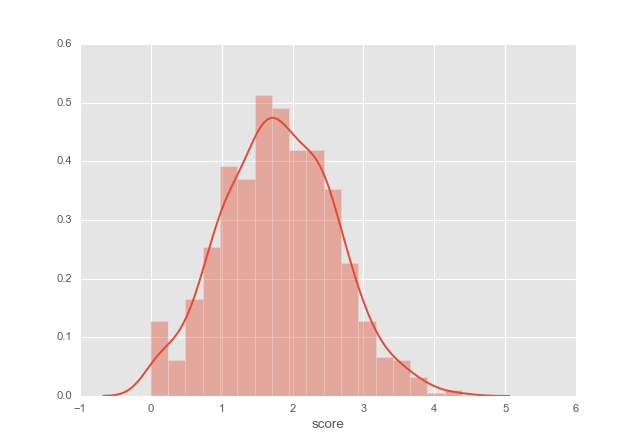

In [26]:
sns.distplot(df['score'])

In [27]:
df[['brand', 'name', 'number_loves', 'number_reviews', 'score', 'review_rating']].sort(['score'], ascending=[0])

/Users/amy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,brand,name,number_loves,number_reviews,score,review_rating
463,First Aid Beauty,Ultra Repair® Cream Intense Hydration,0,4876,4.391437,4.596
468,Josie Maran,100 percent Pure Argan Oil,0,6399,4.180112,4.5129
339,Evian,Mineral Water Spray Duo To Go,0,1311,3.996758,4.5828
466,CLINIQUE,Moisture Surge Extended Thirst Relief,0,2273,3.891612,4.502
477,CLINIQUE,Dramatically Different Moisturizing Gel,0,2819,3.835182,4.4668
184,Yu-Be,Moisturizing Skin Cream,0,1159,3.811612,4.5332
504,boscia,Makeup-Breakup Cool Cleansing Oil,0,2065,3.783147,4.4746
672,Josie Maran,Argan Infinity Cream Intensive Creamy Oil,0,869,3.698112,4.5213
483,belif,The True Cream Moisturizing Bomb,0,524,3.659766,4.5573
514,Dr. Jart+,Ceramidin™ Cream,0,310,3.630347,4.6032


In [ ]:
df_brand = df.groupby('brand')

In [ ]:
df.to_csv("./data/sephora_all.csv", encoding = 'utf-8')

In [ ]:
df_brand.get_group('Son &amp; Park')

In [ ]:
brand_score = df_brand['score'].agg([np.count_nonzero, np.std, np.mean]).sort_values('mean', ascending = False)

In [ ]:
df_brand['score'].agg([np.count_nonzero, np.std, np.mean]).sort_values('mean', ascending = False)

In [ ]:
brand_score.to_csv("./data/brand_score.csv", encoding = 'utf-8')

In [ ]:
dictind = {}
with open('syn.csv') as f: 
    r = csv.DictReader(f)
    for row in r: 
        dictind[row['DictName'].lower()] = row['DictName'].lower()
        for col in ['name1', 'name2', 'name3', 'name4', 'name5', 'name6']:
            if row[col] != '':
                dictind[row[col].lower()] = row['DictName'].lower()

In [ ]:
all_ind = []
for k, v in dictind.iteritems(): 
    all_ind.append(v)
all_ind = list(set(all_ind))

In [ ]:
# Build Dictionary
tempDict = {}
for index, row in df.iterrows(): 
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        continue    
        
    for ind in indlist: 
        ind = ind.strip('-')
        ind = ind.strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        ind = re.sub(r'\+', '', ind)
        ind = ind.lower()
        found = 0
        
        # first search dict
        for k, v in dictind.iteritems(): 
            k_list = k.split('&')
            a = k_list[0].strip().lower()
            b = k_list[-1].strip().lower()
            if ind.find(a) > -1 and ind.find(b) > -1: 
                ind = dictind[k].lower()
                break
            
        try: 
            tempDict[ind] += 1
        except: 
            tempDict[ind] = 1

In [ ]:
tempDict_sorted = sorted(tempDict, key=tempDict.get, reverse = True)

In [ ]:
for i in tempDict_sorted: 
    if i == '': 
        continue
    found = 0
    for j in all_ind:
        if j == '': 
            continue
        if fuzz.partial_ratio(i, j) > 80: 
            dictind[i] = j
            found = 1
            break
            
    if found == 0: 
        all_ind.append(i)
        dictind[i] = i

In [ ]:
with open('syn.json', 'w') as f:
    json.dump(dictind, f)

In [ ]:
with open('syn.json', 'r') as f: 
    dictnew = json.load(f)

In [ ]:
dictnew

In [ ]:
for index, row in df.iterrows(): 
    new_ingredients = ['']
    
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        df.loc[index, 'new_ingredients'] = ''
        continue
        
    for ind in indlist: 
        ind = ind.strip('-')
        ind = ind.strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        ind = re.sub(r'\+', '', ind)
        ind = ind.lower()
        
        found = 0
        try: 
            ind = dictnew[ind]
            found = 1
        except: 
            # first search dict
            for k, v in dictnew.iteritems(): 
                k_list = k.split('&')
                a = k_list[0].strip()
                b = k_list[-1].strip()
                if ind.find(a) > -1 and ind.find(b) > -1: 
                    ind = dictnew[k]
                    found = 1
                    break
        
        ind = re.sub('[^0-9a-zA-Z]+', 'XXX', ind)
        if found == 1: 
            new_ingredients.append(ind)
            continue
            
        new_ingredients.append(ind)
        
    df.set_value(index, 'new_ingredients', ' '.join(new_ingredients))

In [ ]:
df[['ingredient', 'new_ingredients']]

In [ ]:
vectorizer = CountVectorizer(min_df=1)
corpus = df['new_ingredients']
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names())

In [ ]:
X = X.toarray()

In [ ]:
y = np.asarray(df['score'], dtype="|S6")

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
X

In [ ]:
clf = ExtraTreesRegressor(n_estimators=200).fit(X, y)

In [ ]:
clf.score(X.astype(np.float), y.astype(np.float))

In [ ]:
clf.feature_importances_

In [ ]:
n_feature = 50
def feature_im(X, y, color_input='y'): 
    
    forest = ExtraTreesRegressor(n_estimators=250,random_state = int(np.random.random(1)*3521))
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    """
    plt.figure(figsize = (12, 7))
    plt.title(("Feature ranking"))
    plt.bar(range(n_feature), importances[indices[:n_feature]],
           color=color_input, yerr=std[indices[:n_feature]], align="center")
    plt.xticks(range(n_feature), [vectorizer.get_feature_names()[i] for i in indices[:n_feature]], rotation=90)
    plt.xlim([-1, n_feature])
    """
    for i in indices[:n_feature]: 
        print vectorizer.get_feature_names()[i].replace('xxx', ' ')
    #plt.savefig('f_importance_' + condition + p_predict + '.jpg')

In [ ]:
forest = ExtraTreesClassifier(n_estimators=300,random_state = int(np.random.random(1)*3521))
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
[vectorizer.get_feature_names()[i] for i in indices[:5]]

In [ ]:
vectorizer.get_feature_names()[400, 123, 405, 411, 991]

In [ ]:
type(df.columns)

In [ ]:
feature_im(X, y)

In [ ]:
clf = LassoCV().fit(X, y)

In [ ]:
model = SelectFromModel(clf, prefit=True)

In [ ]:
X_new = model.transform(X)

In [ ]:
X

In [ ]:
f = SelectKBest(f_regression, k = 50)
X_new = f.fit_transform(X.astype(np.float), y.astype(np.float))

In [ ]:
X_new.shape

In [ ]:
def dict_hist(d, h): 
    try: 
        d.loc[h, 'n_products'] += 1
    except: 
        d.loc[h, :] = 0.
        d.loc[h, 'n_products'] = 1
    return d

def list_hist(d, h, content, col): 
    try: 
        d.loc[h, col].append(content)
    except AttributeError: 
        d.loc[h, col] = [content]
    return d

def review_hist(d, h, review, col): 
    d.loc[h, col] += review
    return d 

In [ ]:
dicthist = pd.DataFrame(columns = ['n_products', 'n_brands', 'n_reviews', 'n_firststar', 
                                  'n_secondstar', 'n_thirdstar', 'n_fourstar', 'n_fivestar',
                                  'price', 'avg_reviews'])
for index, row in df.iterrows(): 
    brand = row['brand']
    n_reviews = row['number_reviews']
    first_r = row['one_star_reviews']
    second_r = row['two_star_reviews']
    third_r = row['three_star_reviews']
    four_r = row['four_star_reviews']
    five_r = row['five_star_reviews']
    price = row['price']
    review_rating = row['review_rating']
    
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        continue
    
    for ind in indlist: 
        ind = ind.strip('-').strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        found = 0
        
        # first search dict
        for k, v in dictind.iteritems(): 
            k_list = k.split('&')
            a = k_list[0].strip()
            b = k_list[-1].strip()
            if ind.find(a) > -1 and ind.find(b) > -1: 
                dict_hist(dicthist, dictind[k])
                list_hist(dicthist, dictind[k], brand, 'n_brands')
                review_hist(dicthist, dictind[k], n_reviews, 'n_reviews')
                review_hist(dicthist, dictind[k], first_r, 'n_firststar')
                review_hist(dicthist, dictind[k], second_r, 'n_secondstar')
                review_hist(dicthist, dictind[k], third_r, 'n_thirdstar')
                review_hist(dicthist, dictind[k], four_r, 'n_fourstar')
                review_hist(dicthist, dictind[k], five_r, 'n_fivestar')
                
                list_hist(dicthist, dictind[k], price, 'price')
                
                list_hist(dicthist, dictind[k], review_rating, 'avg_reviews')
                """"""
                found = 1
                break
        if found == 1:
            continue     
        dict_hist(dicthist, ind)
        list_hist(dicthist, ind, brand, 'n_brands')
        review_hist(dicthist, ind, n_reviews, 'n_reviews')
        review_hist(dicthist, ind, first_r, 'n_firststar')
        review_hist(dicthist, ind, second_r, 'n_secondstar')
        review_hist(dicthist, ind, third_r, 'n_thirdstar')
        review_hist(dicthist, ind, four_r, 'n_fourstar')
        review_hist(dicthist, ind, five_r, 'n_fivestar')
        
        list_hist(dicthist, ind, price, 'price')
        
        list_hist(dicthist, ind, review_rating, 'avg_reviews')
        """"""

In [ ]:
dicthist.loc['Avena Sativa (Oat) Kernel Extract',:]
#"Avena Sativa (Oat) Kernel Extract"

In [ ]:
for index, row in dicthist.iterrows():
    dicthist.loc[index, 'n_brand'] = len(set(dicthist.loc[index, 'n_brands']))
    dicthist.loc[index, 'avg_review'] = np.mean(dicthist.loc[index, 'avg_reviews'])
    dicthist.loc[index, 'price_v'] = np.mean(dicthist.loc[index, 'price'])

In [ ]:
dicthist

In [ ]:
dicthist.to_csv("./data/sephora_cream.csv", encoding = 'utf-8')

In [ ]:
df_ulta = pd.read_json('./data/ulta-cream.json')
for index, row in df_ulta.iterrows():
    df_ulta.loc[index, 'brand'] = df_ulta.loc[index, 'brand'][0]
    df_ulta.loc[index, 'name'] = df_ulta.loc[index, 'name'][0]
    try:
        df_ulta.loc[index, 'number_reviews'] = df_ulta.loc[index, 'number_reviews'][0]
    except: 
        df_ulta.loc[index, 'number_reviews'] = 0
    df_ulta.loc[index, 'price'] = df_ulta.loc[index, 'price'][0]

In [ ]:
brand_list = set(list(df_ulta['brand'].unique()) + list(df['brand'].unique()))

In [ ]:
sorted(brand_list)

In [ ]:
name_list = set(list(df_ulta['name'].unique()) + list(df['name'].unique()))

In [ ]:
len(name_list)

In [ ]:
print len(list(df_ulta['brand'].unique()))
print len(list(df['brand'].unique()))

In [ ]:
print len(list(df_ulta['name'].unique()))
print len(list(df['name'].unique()))
print len(name_list)

In [ ]:
sorted(name_list)

In [ ]:
df[(df['brand'] == "Eve Lom")]

In [ ]:
dicthist.head()

In [ ]:
%matplotlib inline

In [ ]:
sns.set_style("white")

In [ ]:
brand_list = set(list(df_ulta['name'].unique()) + list(df['name'].unique()))